**Using BeautifulSoup to scrape out data from Bike_Dekho site**

OUTLINE

-Going to scrpae https://www.bikedekho.com/new-bikes#all_brands

-Will get the Brand, BikeName, minPrice, maxPrice, Mileage, Engine power(in PS) for TVS brand

-Output into CSV format

**Using request library to download web pages**

In [1]:
!pip install requests --quiet

In [2]:
import requests

In [3]:
topic_url='https://www.bikedekho.com/tvs-bikes'

In [12]:
header={
   'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
}

In [13]:
response=requests.get(topic_url,headers=header)

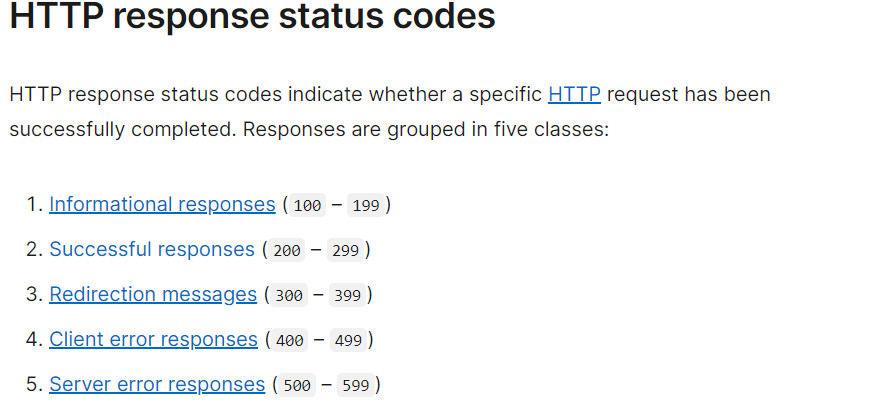

In [14]:
response.status_code

200

In [15]:
len(response.text)

772903

In [16]:
page_content=response.text

In [17]:
page_content[:1000]

'<!DOCTYPE html><html lang="en" itemscope itemtype="http://schema.org/WebPage"><head><meta charset="utf-8"><title itemprop="name">TVS Bikes\xa0Price, New Models 2022, TVS Electric Bikes,Images</title><meta name="description" itemprop="description" content="TVS Bikes\xa0offer 17 models in India, price starting from Rs 45,241. Check new TVS Bikes, on-road price, reviews, images, colors, specs & dealers for TVS."> <link href="https://bd.gaadicdn.com/" rel="preconnect" crossorigin="anonymous"><link href="https://connect.facebook.net" rel="preconnect" crossorigin="anonymous"><link href="https://www.googletagmanager.com" rel="preconnect" crossorigin="anonymous"><link href="https://www.google-analytics.com" rel="preconnect" crossorigin="anonymous"><link href="https://securepubads.g.doubleclick.net" rel="preconnect" crossorigin="anonymous"><link href="https://api.connecto.io" rel="preconnect" crossorigin="anonymous"> <link rel="manifest" href="/manifest.json">    <link rel="canonical" href="ht

In [18]:
with open('wabpage.html','w') as f:
  f.write(page_content)

**Use BeautifulSoup to extract information**

In [19]:
!pip install beautifulsoup4 --quiet

In [20]:
from bs4 import BeautifulSoup

In [21]:
doc = BeautifulSoup(page_content,'html.parser')

In [49]:
Name_tag=doc.find_all('h3')

In [50]:
len(Name_tag)

32

In [68]:
Name=[]

for i in Name_tag:
  Name.append(i.text)

In [79]:
Name=Name[0:15]

In [80]:
Name

['TVS Apache RTR 160',
 'TVS Raider',
 'TVS Apache RTR 160 4V',
 'TVS Apache RR 310',
 'TVS NTORQ 125',
 'TVS iQube Electric',
 'TVS Ronin',
 'TVS XL100',
 'TVS Jupiter',
 'TVS Apache RTR 180',
 'TVS Apache RTR 200 4V',
 'TVS Sport',
 'TVS Radeon',
 'TVS Jupiter 125',
 'TVS Star City Plus']

In [61]:
Price_tag=doc.find_all('div',class_="price")

In [62]:
len(Price_tag)

36

In [69]:
Price=[]

for i in Price_tag:
  Price.append(i.text)

In [131]:
Brand=['TVS']*15

In [91]:
Prices=Price[0:15]

In [92]:
Prices

['Rs.1.18 - 1.25 Lakh*',
 'Rs.85,973 - 99,990*',
 'Rs.1.22 - 1.45 Lakh*',
 'Rs.2.65 Lakh*',
 'Rs.79,956 - 99,961*',
 'Rs.1.61 - 1.61 Lakh*',
 'Rs.1.49 - 1.71 Lakh*',
 'Rs.45,241 - 56,360*',
 'Rs.69,990 - 85,246*',
 'Rs.1.31 Lakh*',
 'Rs.1.40 - 1.45 Lakh*',
 'Rs.63,990 - 68,093*',
 'Rs.59,925 - 78,414*',
 'Rs.82,825 - 89,625*',
 'Rs.74,990 - 78,140*']

In [93]:
lower_limits = []

for price in Prices:
  lower_limit = price.split(" - ")[0]
  lower_limits.append(lower_limit)

print(lower_limits)

['Rs.1.18', 'Rs.85,973', 'Rs.1.22', 'Rs.2.65 Lakh*', 'Rs.79,956', 'Rs.1.61', 'Rs.1.49', 'Rs.45,241', 'Rs.69,990', 'Rs.1.31 Lakh*', 'Rs.1.40', 'Rs.63,990', 'Rs.59,925', 'Rs.82,825', 'Rs.74,990']


In [129]:
len(lower_limits)

15

In [102]:

upper_limits = []

for price in Prices:
  split_prices = price.split(" - ")
  if len(split_prices) > 1:
    upper_limit = split_prices[1].split(" ")[0]
    upper_limits.append(upper_limit)
  else:
    upper_limits.append("NA")

print(upper_limits)

['1.25', '99,990*', '1.45', 'NA', '99,961*', '1.61', '1.71', '56,360*', '85,246*', 'NA', '1.45', '68,093*', '78,414*', '89,625*', '78,140*']


In [130]:
len(upper_limits)

15

In [64]:
  Engine_tag=doc.find_all('div',class_="dotlist")

In [73]:
Engine=[]

for i in Engine_tag:
  Engine.append(i.text)

In [82]:
Engine=Engine[0:15]

In [103]:
Engine

['159.7 cc16.04 PS13.85 Nm @ 7000 rpmPrice In Delhi',
 '67 kmpl124.8 cc11.38 PSPrice In Delhi',
 '47.61 kmpl164.9 cc19.2 PSPrice In Delhi',
 '33.1 kmpl312.2 cc 34 PSPrice In Delhi',
 '54.33 kmpl124.8 cc9.38 PSPrice In Delhi',
 '4400 WPrice In Delhi',
 '42.95 kmpl225.9 cc20.4 PSPrice In Delhi',
 '80 kmpl99.7 cc4.35 PSPrice In Delhi',
 '64 kmpl109.7 cc7.88 PSPrice In Delhi',
 '177.4 cc17.02 PS15.5 Nm @ 7000 rpmPrice In Delhi',
 '197.75 cc20.82 PS17.25 Nm @ 7500 rpmPrice In Delhi',
 '109.7 cc8.29 PS8.7 Nm @ 4500 rpmPrice In Delhi',
 '73.68 kmpl109.7 cc8.19 PSPrice In Delhi',
 '57.27 kmpl124.8 cc8.15 PSPrice In Delhi',
 '83.09 kmpl109.7 cc8.19 PSPrice In Delhi']

In [108]:
import re

In [126]:
engine = []

# Use a for loop to iterate through the list of strings
for data in Engine:
    # Use a regular expression to extract the value from the string
    value = re.findall(r'(\d+\.?\d*) kmpl', data)
    
    # If the regular expression returned any results, append the first element to the list
    if value:
        engine.append(value[0])
    else:
        engine.append('NA')

print(engine)

['NA', '67', '47.61', '33.1', '54.33', 'NA', '42.95', '80', '64', 'NA', 'NA', 'NA', '73.68', '57.27', '83.09']


In [127]:
len(engine)

15

In [124]:
milage = []

# Use a for loop to iterate through the list of strings
for data in Engine:
    # Use a regular expression to extract the value from the string
    value = re.findall(r'(\d+\.?\d*) kmpl', data)
    
    # If the regular expression returned any results, append the first element to the list
    if value:
        milage.append(value[0])
    else:
        milage.append('NA')

print(milage)

['NA', '67', '47.61', '33.1', '54.33', 'NA', '42.95', '80', '64', 'NA', 'NA', 'NA', '73.68', '57.27', '83.09']


In [125]:
len(milage)

15

In [74]:
import pandas as pd

In [134]:
df=pd.DataFrame(dekho_bike)

In [133]:
dekho_bike={
    'Brand':Brand,
    'BikeName':Name,
    'minPrice':lower_limits,
    'maxPrice':upper_limits,
    'Mileage':milage,
    'Engine power(in PS)':engine
}

In [135]:
df

,Brand,BikeName,minPrice,maxPrice,Mileage,Engine power(in PS)
0,TVS,TVS Apache RTR 160,Rs.1.18,1.25,NA,NA
1,TVS,TVS Raider,"Rs.85,973","99,990*",67,67
2,TVS,TVS Apache RTR 160 4V,Rs.1.22,1.45,47.61,47.61
3,TVS,TVS Apache RR 310,Rs.2.65 Lakh*,NA,33.1,33.1
4,TVS,TVS NTORQ 125,"Rs.79,956","99,961*",54.33,54.33
5,TVS,TVS iQube Electric,Rs.1.61,1.61,NA,NA
6,TVS,TVS Ronin,Rs.1.49,1.71,42.95,42.95
7,TVS,TVS XL100,"Rs.45,241","56,360*",80,80
8,TVS,TVS Jupiter,"Rs.69,990","85,246*",64,64
9,TVS,TVS Apache RTR 180,Rs.1.31 Lakh*,NA,NA,NA


**Create CSV files**

In [137]:
df.to_csv('dekho_bike',index=None)